In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['figure.dpi'] = 125
# Loading date wrangling package
from datetime import datetime

In [73]:
df=pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\Electricity Consumption.csv")

In [74]:
df.head()

,DATE,Electricty_Consumption_in_TW
0,01-01-1973,35.9728
1,02-01-1973,36.1334
2,03-01-1973,35.0625
3,04-01-1973,33.8416
4,05-01-1973,33.5107


In [75]:
df.columns=['Date', 'Consumption']
df=df.dropna()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) #set date as index
df.head()

,Consumption
Date,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107


In [76]:
df

,Consumption
Date,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107
...,...
2019-05-01,97.5860
2019-06-01,110.8580
2019-07-01,122.1014


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  561 non-null    float64
dtypes: float64(1)
memory usage: 8.8 KB


In [78]:
df.isna().sum()

Consumption    0
dtype: int64

In [79]:
df.duplicated().sum()

0

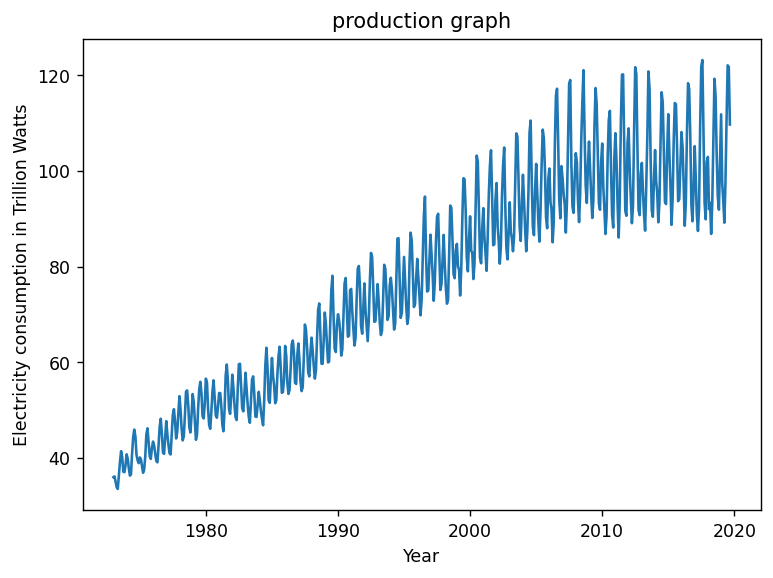

In [80]:
plt.xlabel("Year")
plt.ylabel("Electricity consumption in Trillion Watts")
plt.title("production graph")
plt.plot(df)

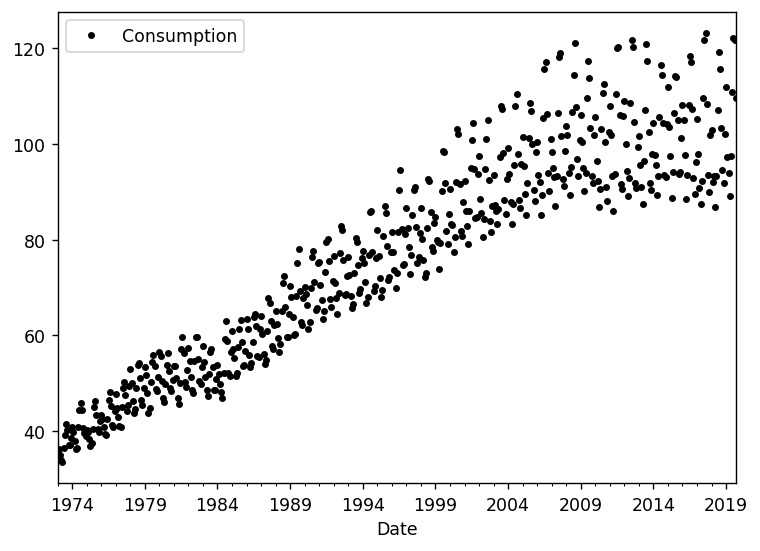

In [81]:
df.plot(style='k.')
plt.show()

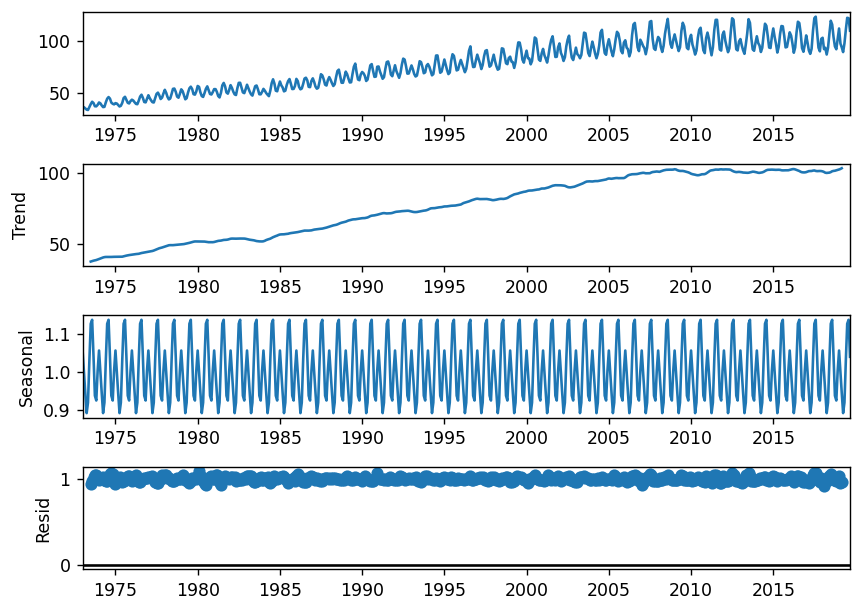

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()

In [83]:
from statsmodels.tsa.stattools import adfuller

In [84]:
def rolling_statistics(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

In [85]:
#Single function for performing adfuller test

#Ho: It is non stationary or there is a unit root in an AR model, which implies that the time series is not stationary
#H1: It is stationary

#The more negative ADF statistics is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.
        
def adfuller_test(timeseries):
    result=adfuller(timeseries)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
     
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

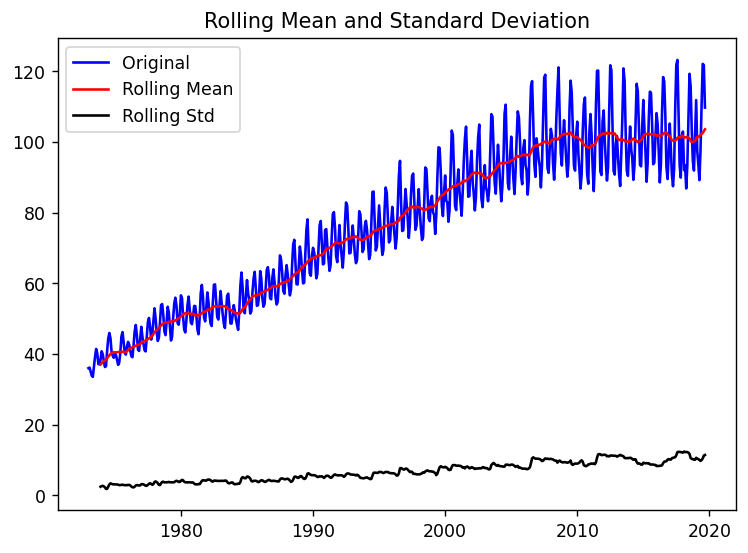

In [86]:
rolling_statistics(df)

In [87]:
adfuller_test(df)

ADF Test Statistic : -1.7405933729832572
p-value : 0.4103281604468614
#Lags Used : 15
Number of Observations Used : 545
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
Critical Values:
	1%: -3.442405720052601
	5%: -2.866857804790472
	10%: -2.5696022094099824


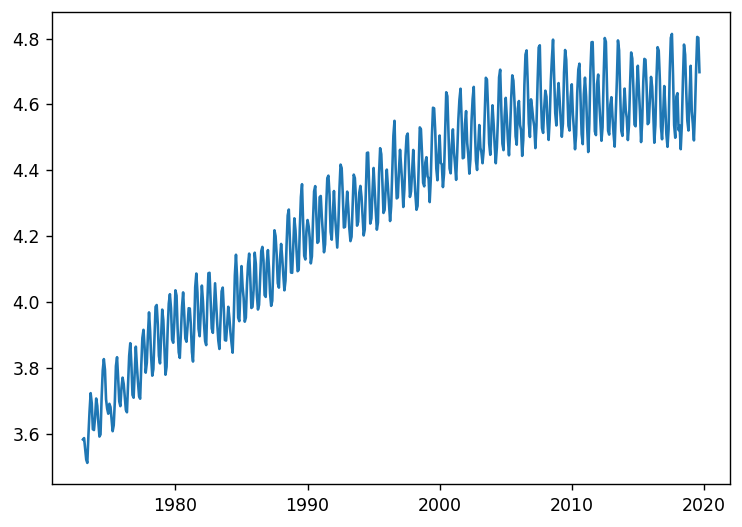

In [88]:
df_log = np.log(df)
plt.plot(df_log)

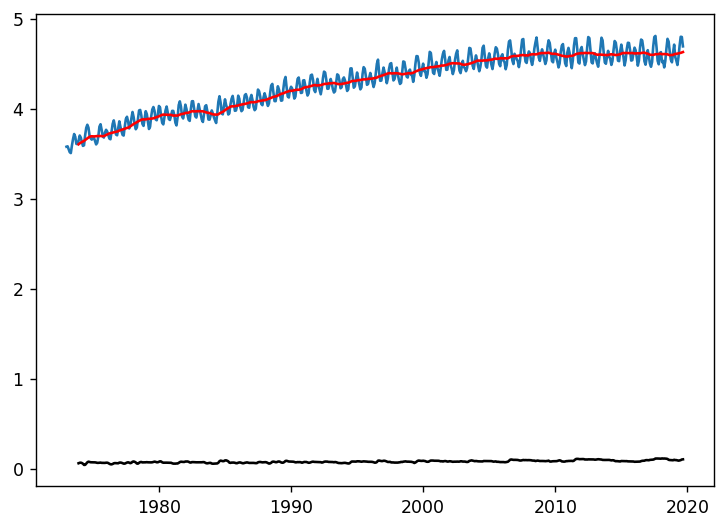

In [89]:
##Rolling statistics ( mean and standard deviation ) of df_log

rolling_mean = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()

plt.plot(df_log)
plt.plot(rolling_mean, color="red")
plt.plot(std_dev, color ="black")

plt.show()

In [90]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  561 non-null    float64
dtypes: float64(1)
memory usage: 8.8 KB


In [91]:
df_log_moving_avg_diff = df_log-rolling_mean
df_log_moving_avg_diff.dropna(inplace=True)

ADF Test Statistic : -6.459932087121436
p-value : 1.4517259827499747e-08
#Lags Used : 14
Number of Observations Used : 535
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
	1%: -3.4426321555520905
	5%: -2.86695748394138
	10%: -2.5696553279762426


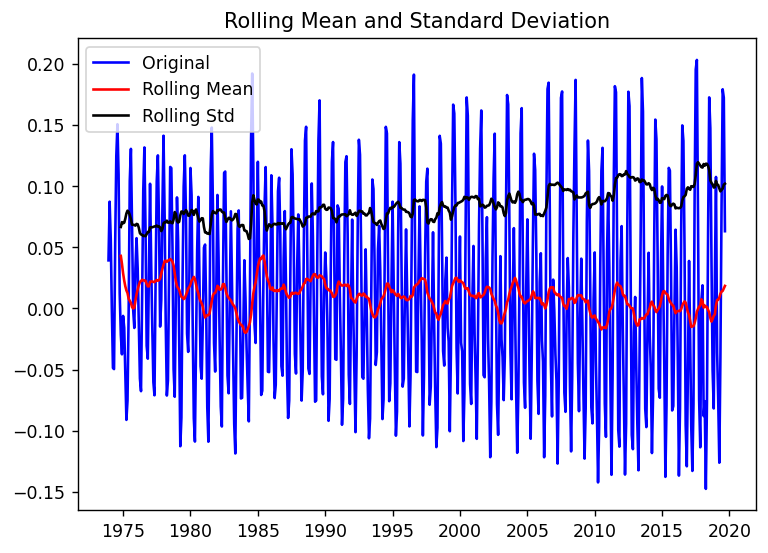

In [92]:
adfuller_test(df_log_moving_avg_diff)
rolling_statistics(df_log_moving_avg_diff)

In [93]:
weighted_average = df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()

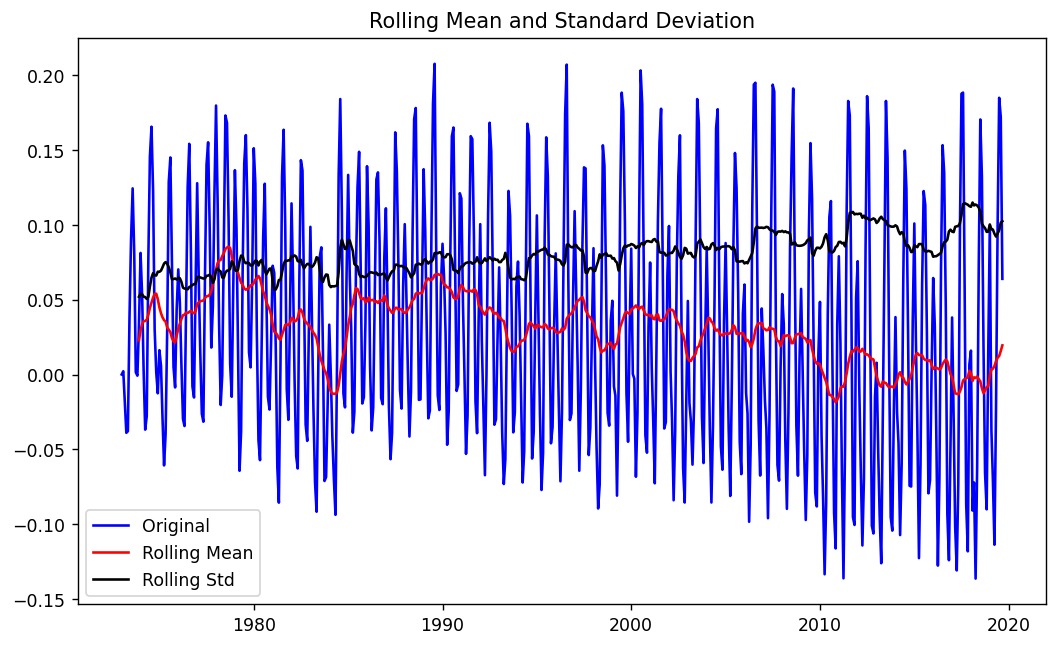

ADF Test Statistic : -3.2369251910434333
p-value : 0.017944355840613376
#Lags Used : 15
Number of Observations Used : 545
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
	1%: -3.442405720052601
	5%: -2.866857804790472
	10%: -2.5696022094099824


In [94]:
df_log_exp_decay = df_log-weighted_average
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
rolling_statistics(df_log_exp_decay)
adfuller_test(df_log_exp_decay)

In [95]:
df_log

,Consumption
Date,
1973-01-01,3.582763
1973-02-01,3.587218
1973-03-01,3.557132
1973-04-01,3.521691
1973-05-01,3.511865
...,...
2019-05-01,4.580734
2019-06-01,4.708250
2019-07-01,4.804852


In [96]:
df['consumption First Difference'] = df['Consumption'] - df['Consumption'].shift(1)

# No.of periods to be shift (1)
# index should be in datetime format

In [97]:
df['Seasonal First Difference']=df['Consumption']-df['Consumption'].shift(12)

In [98]:
df.head(14)

,Consumption,consumption First Difference,Seasonal First Difference
Date,,,
1973-01-01,35.9728,NaN,NaN
1973-02-01,36.1334,0.1606,NaN
1973-03-01,35.0625,-1.0709,NaN
1973-04-01,33.8416,-1.2209,NaN
1973-05-01,33.5107,-0.3309,NaN
1973-06-01,36.4823,2.9716,NaN
1973-07-01,39.1412,2.6589,NaN
1973-08-01,41.4137,2.2725,NaN
1973-09-01,40.1639,-1.2498,NaN


In [99]:
df['Seasonal First Difference']

Date
1973-01-01       NaN
1973-02-01       NaN
1973-03-01       NaN
1973-04-01       NaN
1973-05-01       NaN
               ...  
2019-05-01    4.3499
2019-06-01    3.7571
2019-07-01    2.8140
2019-08-01    6.0657
2019-09-01    6.3120
Name: Seasonal First Difference, Length: 561, dtype: float64

In [100]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.283726159436476
p-value : 3.74199017552202e-08
#Lags Used : 12
Number of Observations Used : 536
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
	1%: -3.442609129942274
	5%: -2.866947348175723
	10%: -2.569649926626197


<AxesSubplot:xlabel='Date'>

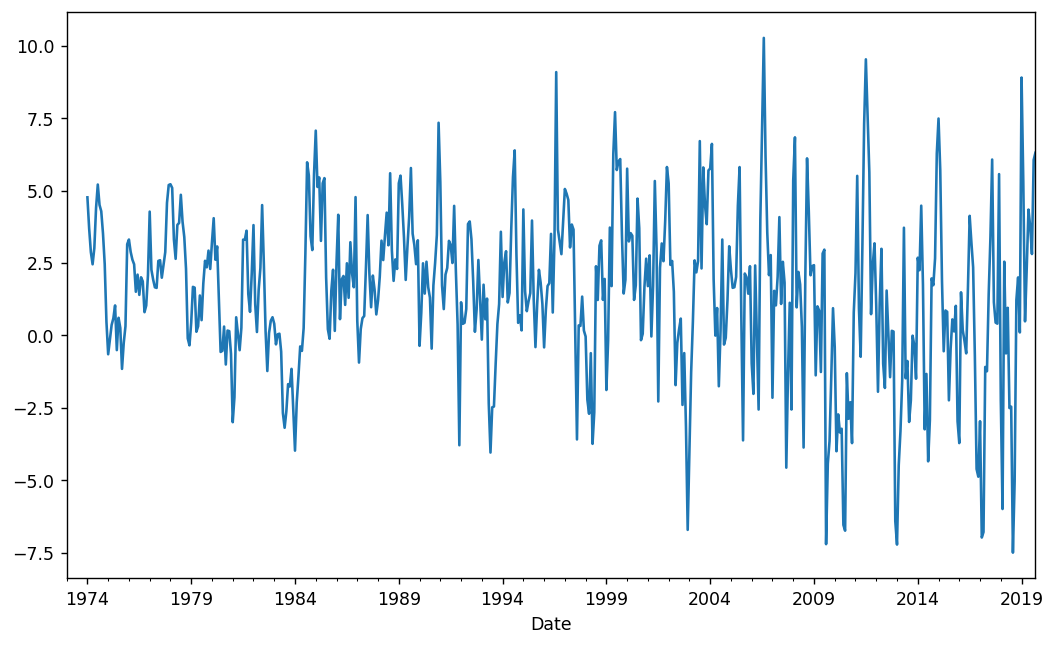

In [101]:
df['Seasonal First Difference'].plot()

In [102]:
df_log

,Consumption
Date,
1973-01-01,3.582763
1973-02-01,3.587218
1973-03-01,3.557132
1973-04-01,3.521691
1973-05-01,3.511865
...,...
2019-05-01,4.580734
2019-06-01,4.708250
2019-07-01,4.804852


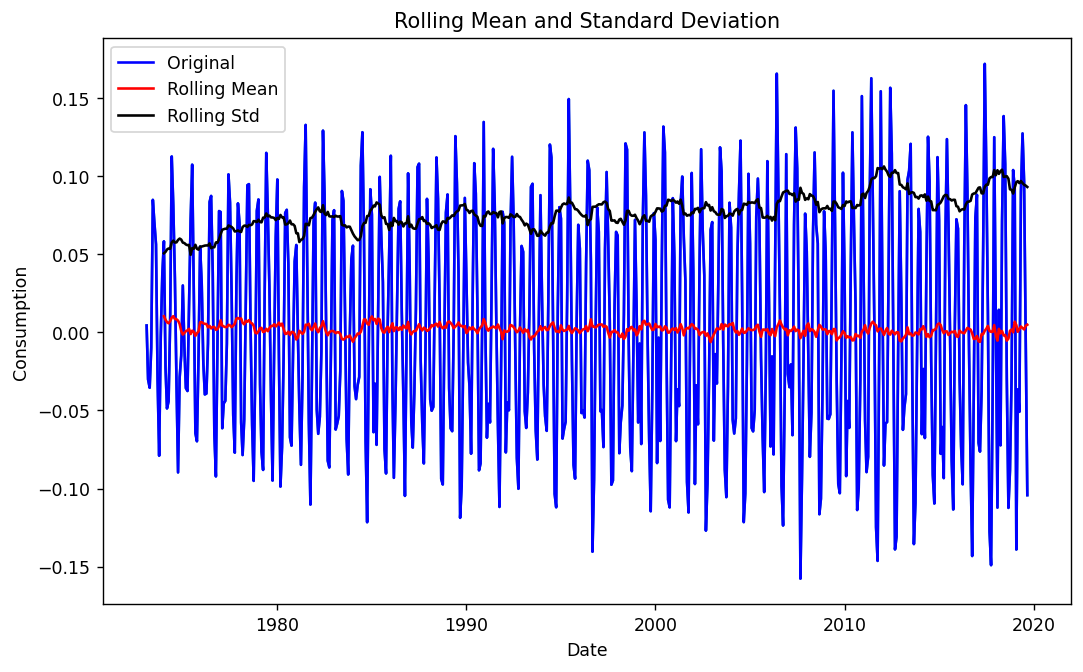

ADF Test Statistic : -6.884809722917903
p-value : 1.4034181751307451e-09
#Lags Used : 14
Number of Observations Used : 545
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
	1%: -3.442405720052601
	5%: -2.866857804790472
	10%: -2.5696022094099824


In [103]:
df_log_diff = df_log - df_log.shift() #by default the period is 1. we can do it by above single syntax also.
df_log_diff.dropna(inplace=True)

plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Consumption")

#plt.plot(df_log['consumption First Difference'])
plt.plot(df_log_diff)                                          #Let us test the stationarity of our resultant series

#df_log['consumption First Difference'].dropna(inplace=True)
#rolling_statistics(df_log['consumption First Difference'])
#adfuller_test(df_log['consumption First Difference'].dropna())

rolling_statistics(df_log_diff)
adfuller_test(df_log_diff.dropna())

In [104]:
df_log_diff.head()

,Consumption
Date,
1973-02-01,0.004455
1973-03-01,-0.030085
1973-04-01,-0.035441
1973-05-01,-0.009826
1973-06-01,0.084962


In [107]:
from chart_studio.plotly import plot_mpl

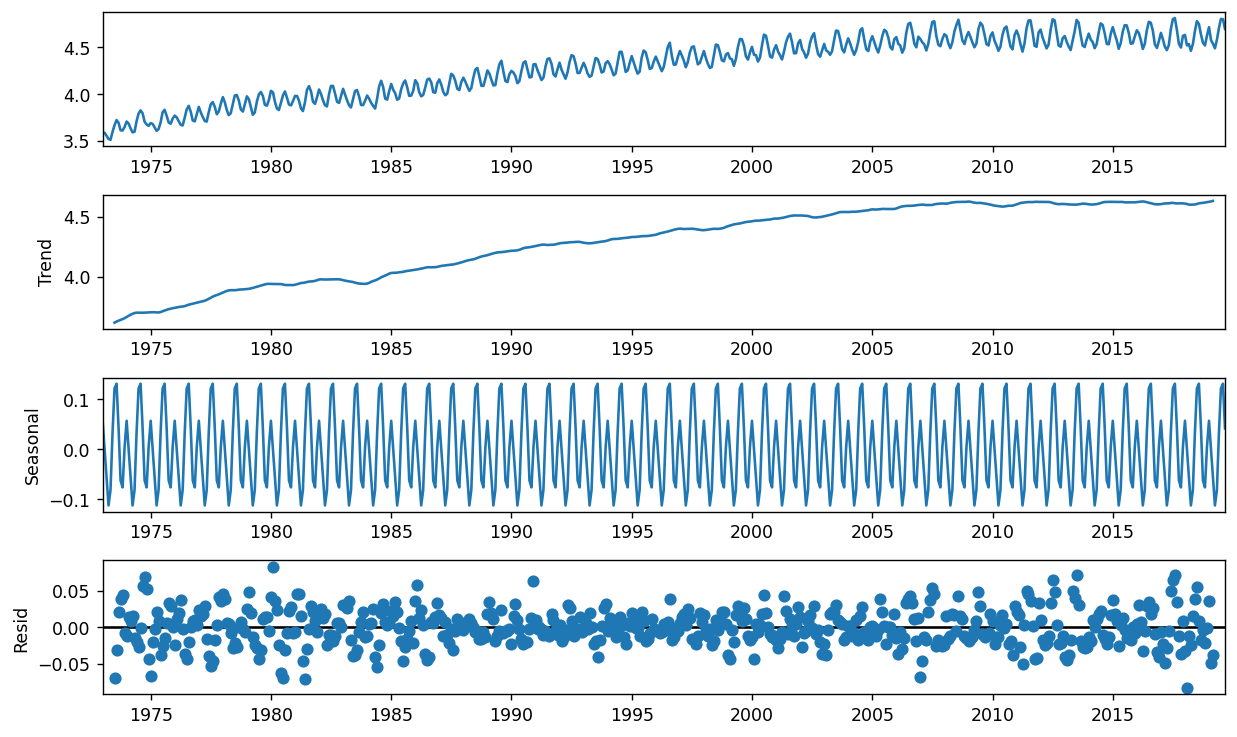

In [114]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_log, model='additive')
result.plot()
plt.show()


ADF Test Statistic : -7.806842775685832
p-value : 7.2434966136659176e-12
#Lags Used : 19
Number of Observations Used : 529
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
	1%: -3.442772146350605
	5%: -2.8670191055991836
	10%: -2.5696881663873414


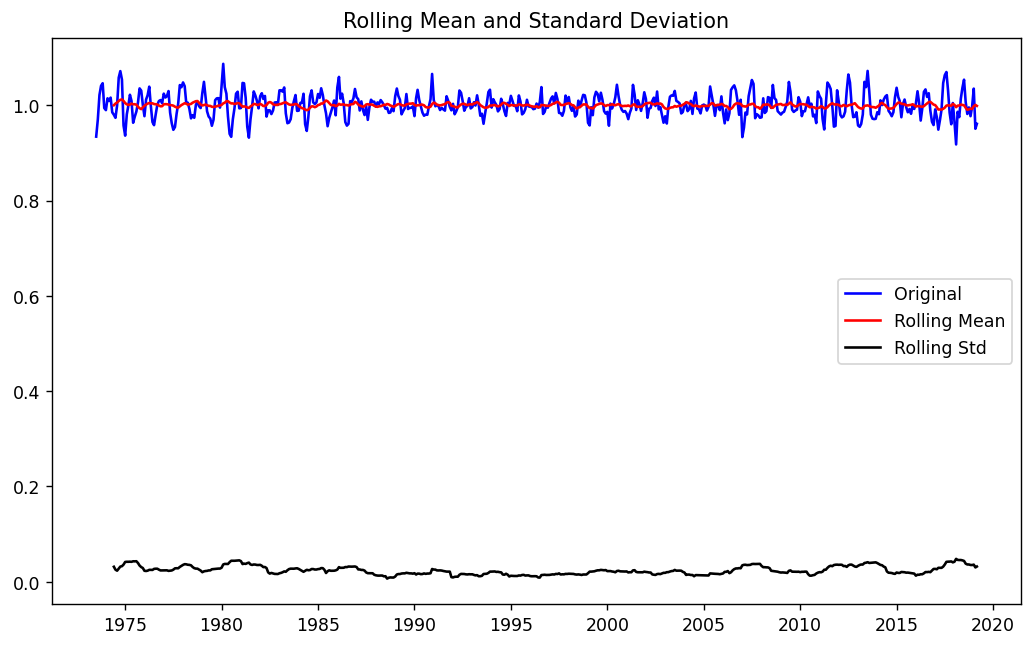

In [109]:
trend = result.trend
trend.dropna(inplace=True)

seasonality = result.seasonal
seasonality.dropna(inplace=True)

residual = result.resid
residual.dropna(inplace=True)

adfuller_test(residual)
rolling_statistics(residual)

plt.show()

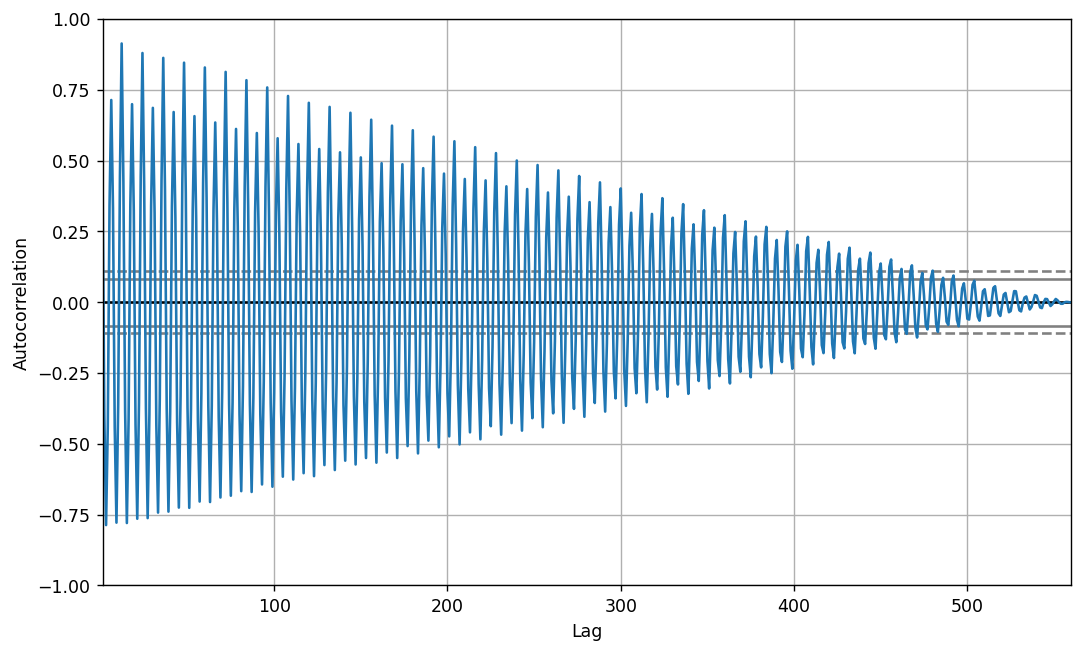

In [36]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_log_diff['Consumption'])
plt.show()  

In [37]:
from statsmodels.graphics.tsaplots import plot_acf

Text(0.5, 1.0, 'Auto corelation function')

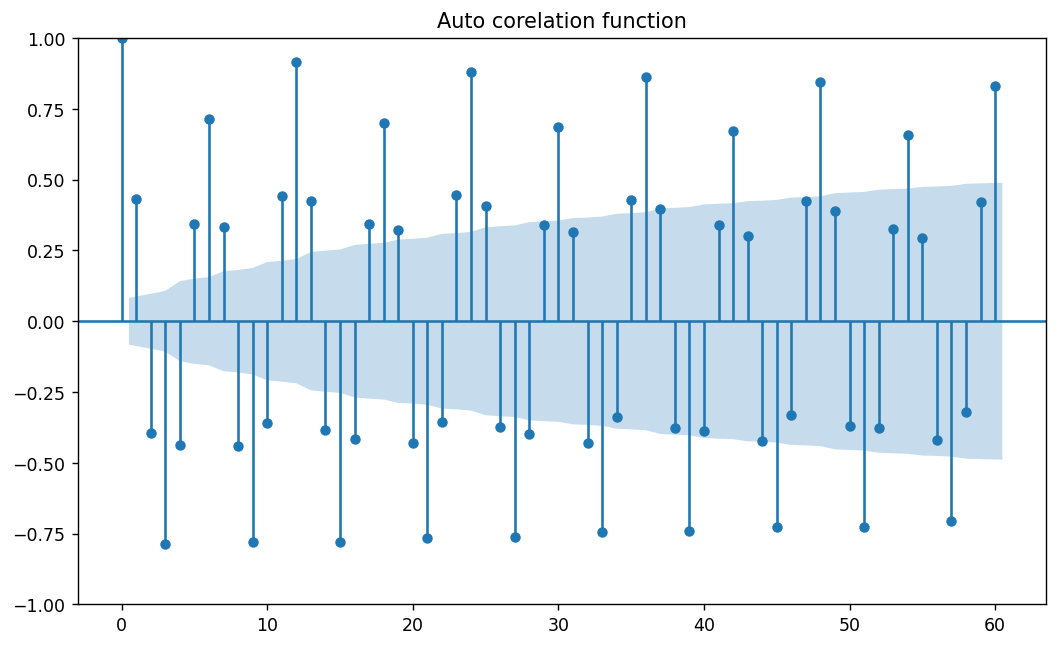

In [38]:
acf=plot_acf(df_log_diff['Consumption'],lags=60)
#plt.subplot(121)
acf
#plt.axhline(y=0,linestyle='-',color='blue')
#plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
#plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corelation function')
#plt.tight_layout()#plot ACF

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


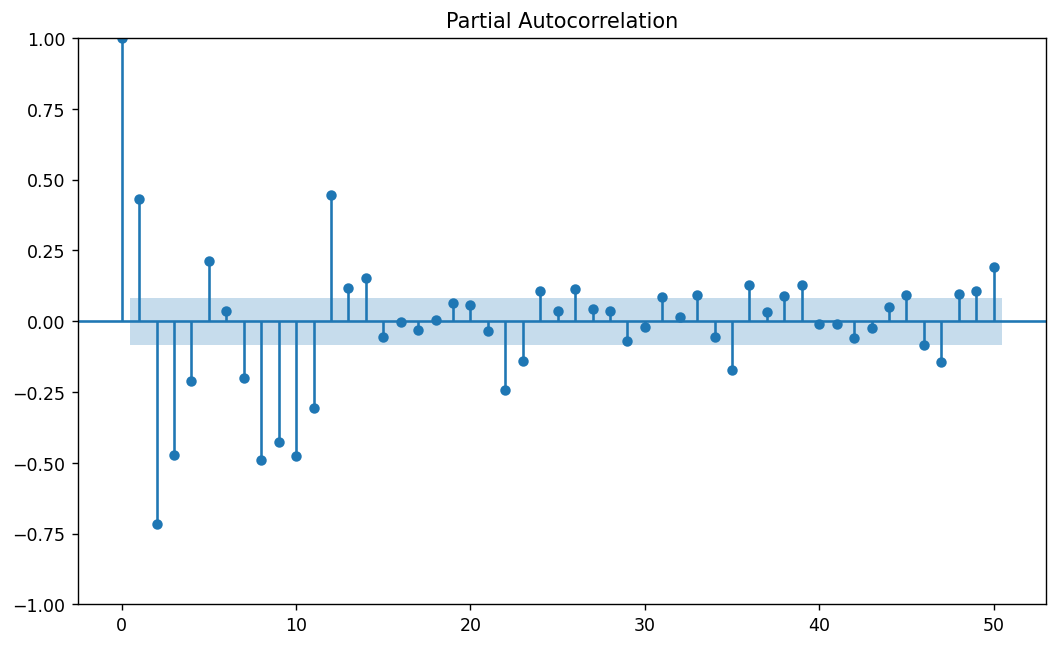

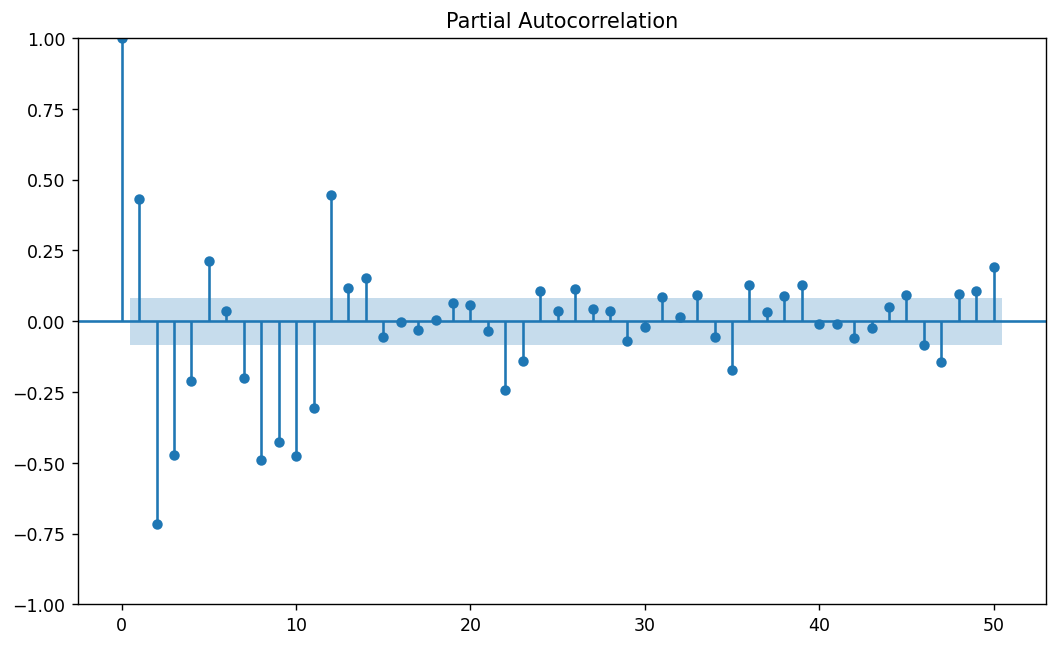

In [40]:
plot_pacf(df_log_diff['Consumption'], lags=50)

In [41]:
df_log_diff

,Consumption
Date,
1973-02-01,0.004455
1973-03-01,-0.030085
1973-04-01,-0.035441
1973-05-01,-0.009826
1973-06-01,0.084962
...,...
2019-05-01,0.089995
2019-06-01,0.127516
2019-07-01,0.096602


In [42]:
from  statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df_log_diff, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Consumption   No. Observations:                  560
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 786.471
Date:                Sun, 30 Apr 2023   AIC                          -1564.943
Time:                        09:56:09   BIC                          -1547.631
Sample:                    02-01-1973   HQIC                         -1558.183
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.005      0.402      0.688      -0.007       0.011
ar.L1          0.1438      0.077      1.871      0.061      -0.007       0.294
ma.L1          0.6090      0.052     11.786      0.0

In [43]:
pred = pd.Series(model_fit.predict(dynamic=False))
pred

1973-02-01    0.001895
1973-03-01    0.003250
1973-04-01   -0.020575
1973-05-01   -0.012142
1973-06-01    0.001598
                ...   
2019-05-01   -0.064303
2019-06-01    0.108525
2019-07-01    0.031524
2019-08-01    0.055143
2019-09-01   -0.033963
Freq: MS, Name: predicted_mean, Length: 560, dtype: float64

In [44]:
final_data = pd.concat((df_log_diff,pred),axis = 1)
final_data

,Consumption,predicted_mean
1973-02-01,0.004455,0.001895
1973-03-01,-0.030085,0.003250
1973-04-01,-0.035441,-0.020575
1973-05-01,-0.009826,-0.012142
1973-06-01,0.084962,0.001598
...,...,...
2019-05-01,0.089995,-0.064303
2019-06-01,0.127516,0.108525
2019-07-01,0.096602,0.031524
2019-08-01,-0.002664,0.055143


<AxesSubplot:>

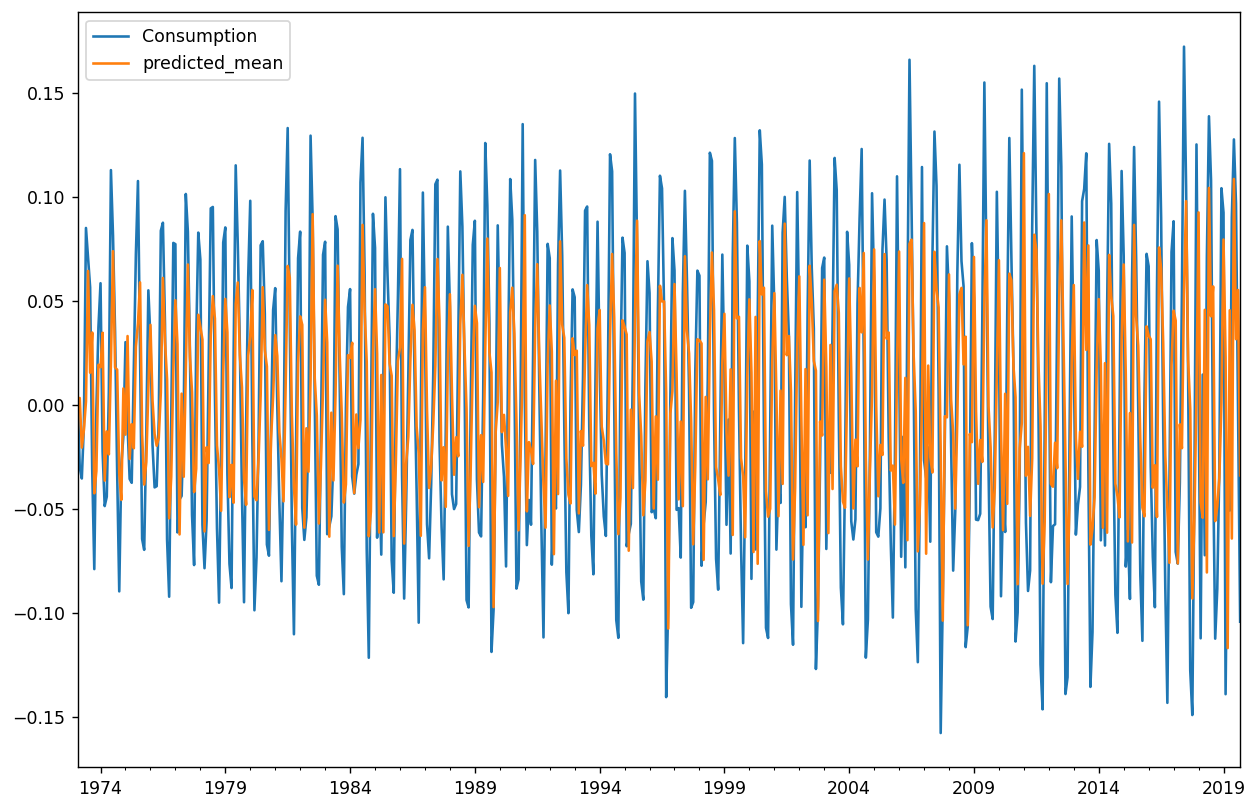

In [45]:
final_data[['Consumption','predicted_mean']].plot(figsize=(12,8))

In [46]:
final_data.tail()

,Consumption,predicted_mean
2019-05-01,0.089995,-0.064303
2019-06-01,0.127516,0.108525
2019-07-01,0.096602,0.031524
2019-08-01,-0.002664,0.055143
2019-09-01,-0.104265,-0.033963


In [47]:
forecasted = model_fit.get_forecast(steps=36, alpha=0.05)

In [48]:
forecasted.predicted_mean

2019-10-01   -0.056182
2019-11-01   -0.006457
2019-12-01    0.000694
2020-01-01    0.001722
2020-02-01    0.001870
2020-03-01    0.001891
2020-04-01    0.001894
2020-05-01    0.001895
2020-06-01    0.001895
2020-07-01    0.001895
2020-08-01    0.001895
2020-09-01    0.001895
2020-10-01    0.001895
2020-11-01    0.001895
2020-12-01    0.001895
2021-01-01    0.001895
2021-02-01    0.001895
2021-03-01    0.001895
2021-04-01    0.001895
2021-05-01    0.001895
2021-06-01    0.001895
2021-07-01    0.001895
2021-08-01    0.001895
2021-09-01    0.001895
2021-10-01    0.001895
2021-11-01    0.001895
2021-12-01    0.001895
2022-01-01    0.001895
2022-02-01    0.001895
2022-03-01    0.001895
2022-04-01    0.001895
2022-05-01    0.001895
2022-06-01    0.001895
2022-07-01    0.001895
2022-08-01    0.001895
2022-09-01    0.001895
Freq: MS, Name: predicted_mean, dtype: float64

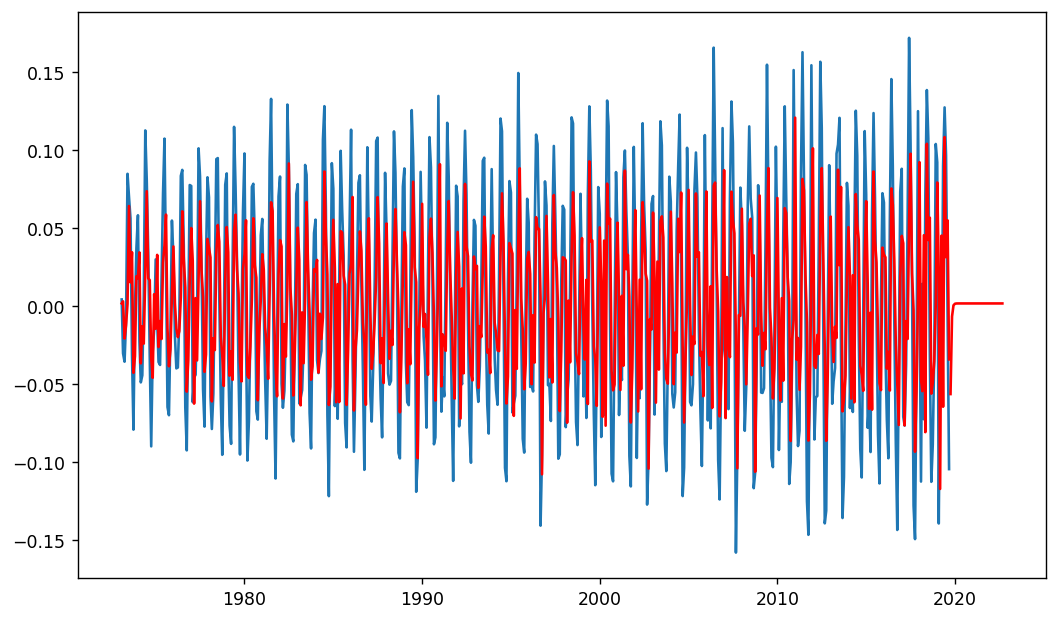

In [49]:
plt.plot(df_log_diff)
plt.plot(model_fit.predict(dynamic=False), color= 'red')
plt.plot(forecasted.predicted_mean, color ='red')

In [50]:
import statsmodels.api as sm

In [51]:
model_sarimax=sm.tsa.statespace.SARIMAX(df_log_diff['Consumption'],order=(1, 0, 1),seasonal_order=(1,0,1,12))
model_fit_sarimax=model_sarimax.fit()
print(model_fit_sarimax.summary())

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        Consumption   No. Observations:                  560
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                1352.259
Date:                            Sun, 30 Apr 2023   AIC                          -2694.517
Time:                                    09:58:25   BIC                          -2672.878
Sample:                                02-01-1973   HQIC                         -2686.068
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6363      0.047     13.511      0.000       0.544       0.729
ma.L1         -0.9070      0.026   

In [52]:
pred_sarimax = pd.Series(model_fit_sarimax.predict(dynamic=False))
pred_sarimax

1973-02-01    0.000000
1973-03-01   -0.000775
1973-04-01    0.005350
1973-05-01    0.012367
1973-06-01    0.013243
                ...   
2019-05-01    0.057004
2019-06-01    0.128718
2019-07-01    0.089127
2019-08-01   -0.015521
2019-09-01   -0.115206
Freq: MS, Name: predicted_mean, Length: 560, dtype: float64

In [53]:
final_data_sarimax = pd.concat((df_log_diff,pred_sarimax),axis = 1)
final_data_sarimax

,Consumption,predicted_mean
1973-02-01,0.004455,0.000000
1973-03-01,-0.030085,-0.000775
1973-04-01,-0.035441,0.005350
1973-05-01,-0.009826,0.012367
1973-06-01,0.084962,0.013243
...,...,...
2019-05-01,0.089995,0.057004
2019-06-01,0.127516,0.128718
2019-07-01,0.096602,0.089127
2019-08-01,-0.002664,-0.015521


<AxesSubplot:>

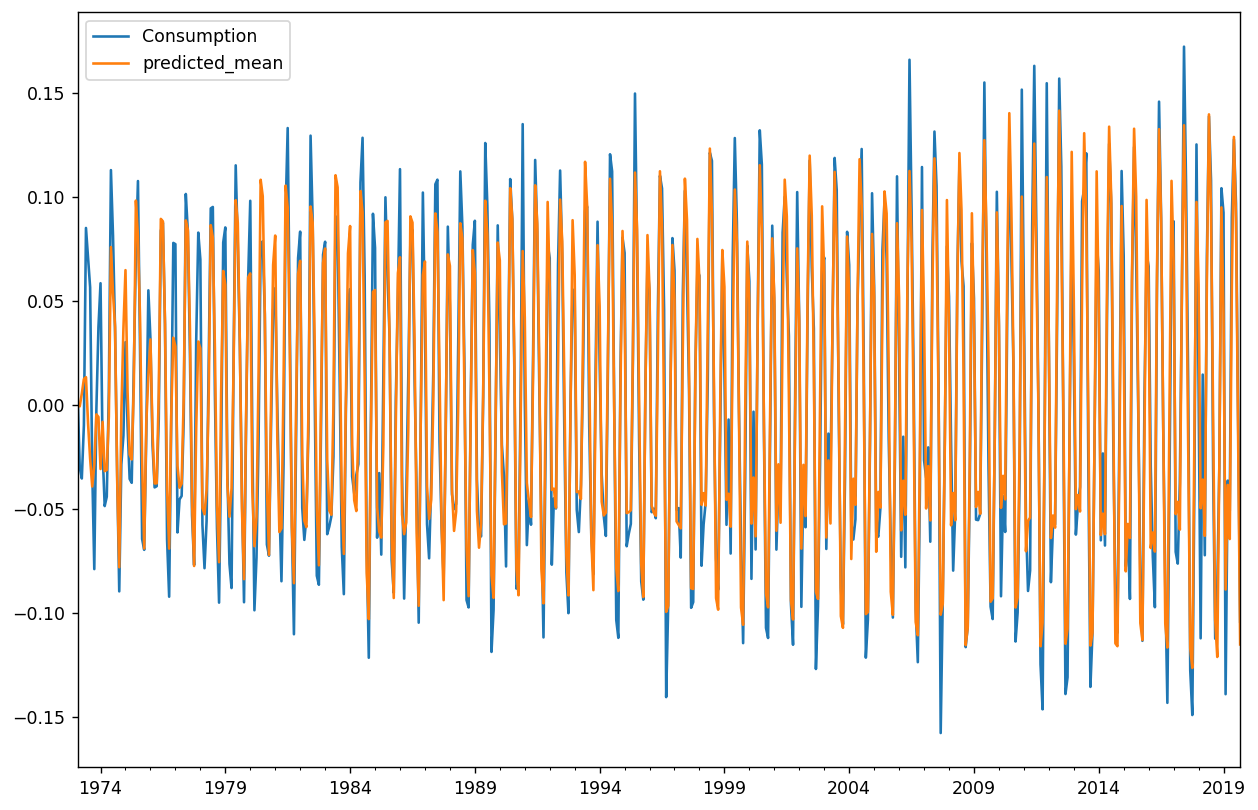

In [54]:
final_data_sarimax[['Consumption','predicted_mean']].plot(figsize=(12,8))

In [55]:
final_data_sarimax.tail()

,Consumption,predicted_mean
2019-05-01,0.089995,0.057004
2019-06-01,0.127516,0.128718
2019-07-01,0.096602,0.089127
2019-08-01,-0.002664,-0.015521
2019-09-01,-0.104265,-0.115206


In [56]:
forecasted_sarimax = model_fit_sarimax.get_forecast(steps=36, alpha=0.05)

In [57]:
forecasted_sarimax.predicted_mean

2019-10-01   -0.124109
2019-11-01   -0.028442
2019-12-01    0.096089
2020-01-01    0.056770
2020-02-01   -0.089508
2020-03-01   -0.041285
2020-04-01   -0.062755
2020-05-01    0.066333
2020-06-01    0.135777
2020-07-01    0.095303
2020-08-01   -0.007843
2020-09-01   -0.106605
2020-10-01   -0.117843
2020-11-01   -0.024657
2020-12-01    0.098042
2021-01-01    0.058030
2021-02-01   -0.088205
2021-03-01   -0.040519
2021-04-01   -0.062121
2021-05-01    0.066312
2021-06-01    0.135390
2021-07-01    0.095021
2021-08-01   -0.007749
2021-09-01   -0.106139
2021-10-01   -0.117348
2021-11-01   -0.024542
2021-12-01    0.097661
2022-01-01    0.057805
2022-02-01   -0.087849
2022-03-01   -0.040354
2022-04-01   -0.061872
2022-05-01    0.066048
2022-06-01    0.134851
2022-07-01    0.094642
2022-08-01   -0.007718
2022-09-01   -0.105716
Freq: MS, Name: predicted_mean, dtype: float64

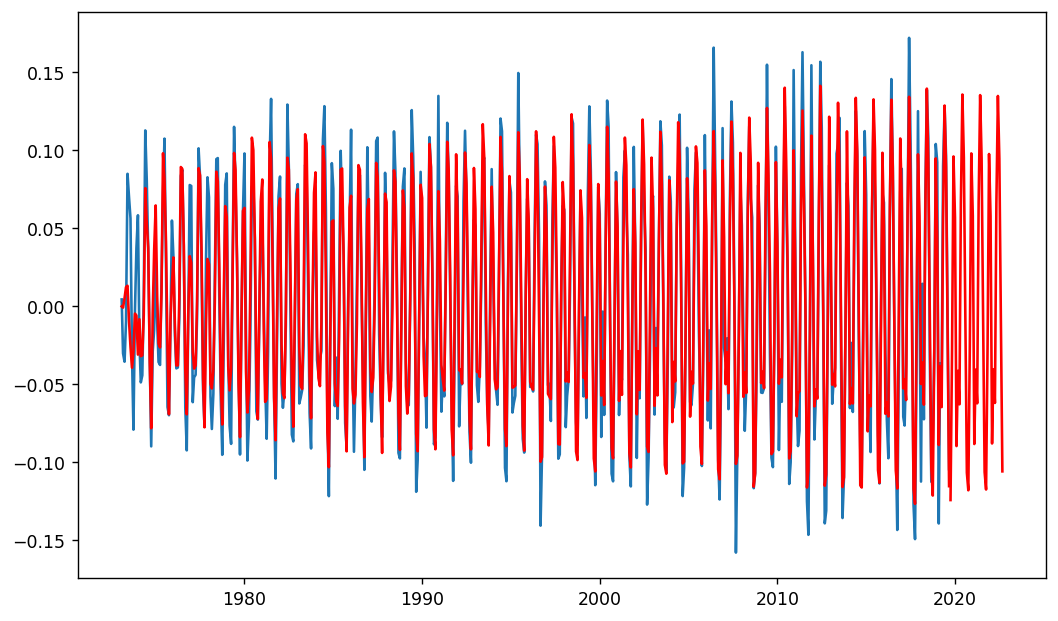

In [58]:
plt.plot(df_log_diff)
plt.plot(model_fit_sarimax.predict(dynamic=False), color ='red')
plt.plot(forecasted_sarimax.predicted_mean, color ='red')

In [116]:
final_data_sarimax

,Consumption,predicted_mean
1973-02-01,0.004455,0.000000
1973-03-01,-0.030085,-0.000775
1973-04-01,-0.035441,0.005350
1973-05-01,-0.009826,0.012367
1973-06-01,0.084962,0.013243
...,...,...
2019-05-01,0.089995,0.057004
2019-06-01,0.127516,0.128718
2019-07-01,0.096602,0.089127
2019-08-01,-0.002664,-0.015521


In [60]:
def forecast_accuracy(ac, fo):
    mape =np.mean(np.abs(final_data.Consumption-final_data.predicted_mean)/np.abs(final_data.Consumption)) #MAPE
    mean =np.mean(final_data.Consumption-final_data.predicted_mean) #MEAN
    mae = np.mean(np.abs(final_data.Consumption-final_data.predicted_mean))   #MAE
    mpe= np.mean(final_data.Consumption-final_data.predicted_mean)/final_data.Consumption# MPE
    rmse = np.mean((final_data.Consumption-final_data.predicted_mean)**2)**.5 #RMSE
    corr = np.corrcoef(final_data.Consumption-final_data.predicted_mean)[0,1]  #corr

    return({'MAPE' : mape, 'MEAN' : mean, 'MAE' :mae , 'MPE':mpe, 'RMSE' : rmse, 'CORR':corr})

In [61]:
mape= np.mean(np.abs(final_data.Consumption-final_data.predicted_mean)/np.abs(final_data.Consumption)) #MAPE

mape2= np.mean(np.abs(final_data_sarimax.Consumption-final_data_sarimax.predicted_mean)/np.abs(final_data_sarimax.Consumption)) #MAPE

In [62]:
print('value of mape is',mape)
print('value of mape2 is',mape2)

value of mape is 1.7365929158744384
value of mape2 is 0.6075592006847716


In [63]:
mean =np.mean(final_data.Consumption-final_data.predicted_mean) 

In [64]:
mean2 =np.mean(final_data_sarimax.Consumption-final_data_sarimax.predicted_mean)

In [65]:
print('value of mean is',mean)
print('value of mean2 is',mean2)

value of mean is -1.5202479535572236e-05
value of mean2 is -0.0010073991970623974


In [66]:
mpe= np.mean(final_data.Consumption-final_data.predicted_mean)/final_data.Consumption# MPE
mpe2= np.mean(final_data_sarimax.Consumption-final_data_sarimax.predicted_mean)/final_data_sarimax.Consumption# MPE

In [67]:
print('value of mpe is',mpe)
print('value of mpe2 is',mpe2)

value of mpe is 1973-02-01   -0.003413
1973-03-01    0.000505
1973-04-01    0.000429
1973-05-01    0.001547
1973-06-01   -0.000179
                ...   
2019-05-01   -0.000169
2019-06-01   -0.000119
2019-07-01   -0.000157
2019-08-01    0.005706
2019-09-01    0.000146
Name: Consumption, Length: 560, dtype: float64
value of mpe2 is 1973-02-01   -0.226151
1973-03-01    0.033485
1973-04-01    0.028424
1973-05-01    0.102524
1973-06-01   -0.011857
                ...   
2019-05-01   -0.011194
2019-06-01   -0.007900
2019-07-01   -0.010428
2019-08-01    0.378089
2019-09-01    0.009662
Name: Consumption, Length: 560, dtype: float64


In [68]:
rmse = np.mean((final_data.Consumption-final_data.predicted_mean)**2)**.5 #RMSE

rmse2 = np.mean((final_data_sarimax.Consumption-final_data_sarimax.predicted_mean)**2)**.5 #RMSE

In [69]:
print('value of rmse is',rmse)
print('value of rmse2 is',rmse2)

value of rmse is 0.05937472154098553
value of rmse2 is 0.02235416203218487


In [ ]:
#SARIMAX model works well with lower error